In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from ipywidgets import interactive

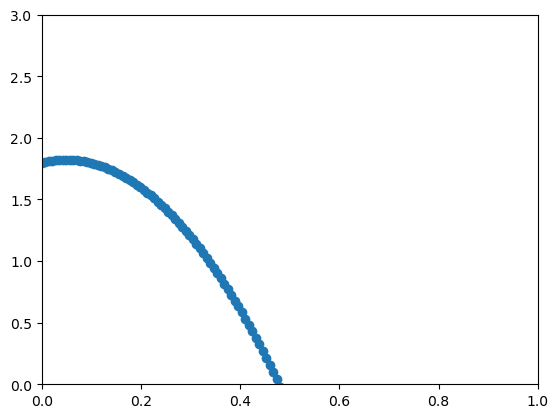

interactive(children=(IntSlider(value=2, description='h', max=3), IntSlider(value=45, description='deg', max=9…

In [11]:
def ballthrow(h, deg):
    x = 0
    y = h 
    v = 1
    g = 9.8
    theta = np.radians(deg)
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    t = 0
    dt = 0.01
    T = [t]
    X = [x]
    Y = [y]
    while y >= 0:
        t += dt 
        vx += 0
        vy += -g*dt 
        x += vx*dt
        y += vy*dt
        T.append(t)
        X.append(x)
        Y.append(y)
    plt.scatter(X, Y)
    plt.ylim(0, 3)
    plt.xlim(0, 1)
    plt.show()
ballthrow(1.8, 45)
interactive(ballthrow, 
            h = widgets.IntSlider(min=0, max=3, step=1, value=2), 
            deg = widgets.IntSlider(min=0, max=90,step=5,value=45))
